In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mmsno
from collections import Counter

In [7]:
#load dataset
file_path = r"C:\Users\shopinverse\Documents\Dune Sales Data.csv"
df=pd.read_csv(file_path)

In [5]:
# Display the first three rows of the dataset
df.head(3)

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,Unit_Cost,Unit_Price
0,19-Feb-16,High,Segun,29,F,Abia,Accessories,Keyboard,Online,1.0,80.00,109.0
1,20-Feb-16,High,Segun,29,F,Abia,Clothing,Polo shirts,Online,2.0,24.50,28.5
2,27-Feb-16,High,Segun,29,F,Abia,Accessories,Keyboard,Online,3.0,3.67,5.0


In [4]:
# Display the last three rows of the dataset
df.tail(3)

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,Unit_Cost,Unit_Price
34864,5-Apr-15,High,Kenny,38,M,Ebonyi,Phones,IPhone,Online,3.0,683.0,560.67
34865,30-Aug-15,High,Kenny,38,M,Ebonyi,Phones,IPhone,Online,1.0,2320.0,1568.00
34866,NaN,NaN,NaN,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#Determine the shape of the dataset which is a 34867 by 12 matrix. The dataset comprises of 34867 rows and 12 columns.
df.shape

(34867, 12)

In [6]:
#Display the 12 unique columns of the dataset.
df.columns

Index(['Date', 'Customer', 'Sales Person', 'Customer_Age', 'Customer_Gender',
       'State', 'Product_Category', 'Sub_Category', 'Payment Option',
       'Quantity', 'Unit_Cost', 'Unit_Price'],
      dtype='object')

In [7]:
#Display the core frame of the dataset which highlights the various datatypes in the dataset. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34867 entries, 0 to 34866
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              34866 non-null  object 
 1   Customer          34866 non-null  object 
 2   Sales Person      34866 non-null  object 
 3   Customer_Age      34867 non-null  int64  
 4   Customer_Gender   34866 non-null  object 
 5   State             34866 non-null  object 
 6   Product_Category  34866 non-null  object 
 7   Sub_Category      34866 non-null  object 
 8   Payment Option    34866 non-null  object 
 9   Quantity          34866 non-null  float64
 10  Unit_Cost         34866 non-null  float64
 11  Unit_Price        34866 non-null  float64
dtypes: float64(3), int64(1), object(8)
memory usage: 3.2+ MB


In [8]:
#Determine the statistical measures which represents the center of the dataset. 
#In other words, the measure of central tendency of the dataset which is the mean, median and mode values from the numerical columns in the dataset. 
df.describe()

,Customer_Age,Quantity,Unit_Cost,Unit_Price
count,34867.000000,34866.000000,34866.000000,34866.000000
mean,36.382683,2.002524,349.880567,389.232473
std,11.112813,0.813936,490.015846,525.319097
min,17.000000,1.000000,0.670000,0.670000
25%,28.000000,1.000000,45.000000,53.670000
50%,35.000000,2.000000,150.000000,179.000000
75%,44.000000,3.000000,455.000000,521.000000
max,87.000000,3.000000,3240.000000,5082.000000


In [11]:
#Investigate missing data in the dataset.
null_vals=df.isnull().sum()
null_vals

Date                1
Customer            1
Sales Person        1
Customer_Age        0
Customer_Gender     1
State               1
Product_Category    1
Sub_Category        1
Payment Option      1
Quantity            1
Unit_Cost           1
Unit_Price          1
dtype: int64

In [16]:
plt.figure(figsize=(8,5))
sns.heatmap(df.isnull(), annot=True, cmap="magma_r")
mmsno.bar(df, color="blue");

<Axes: >

Error in callback <function flush_figures at 0x00000175831C87C0> (for post_execute):


KeyboardInterrupt: 

In [17]:
#Display the missing data in the dataset
df.isnull()

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,Unit_Cost,Unit_Price
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
34862,False,False,False,False,False,False,False,False,False,False,False,False
34863,False,False,False,False,False,False,False,False,False,False,False,False
34864,False,False,False,False,False,False,False,False,False,False,False,False
34865,False,False,False,False,False,False,False,False,False,False,False,False


In [18]:
#Drop/remove the missing rows 
df.dropna(inplace=True)

In [20]:
#Confirm if missing rows were successfully removed
''' Where output is Zero, confirms no missing data '''

df.isnull().sum()

Date                0
Customer            0
Sales Person        0
Customer_Age        0
Customer_Gender     0
State               0
Product_Category    0
Sub_Category        0
Payment Option      0
Quantity            0
Unit_Cost           0
Unit_Price          0
dtype: int64

In [21]:
#Re-check the frame of the dataset after completion of the data cleansing procedure.  
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34866 entries, 0 to 34865
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              34866 non-null  object 
 1   Customer          34866 non-null  object 
 2   Sales Person      34866 non-null  object 
 3   Customer_Age      34866 non-null  int64  
 4   Customer_Gender   34866 non-null  object 
 5   State             34866 non-null  object 
 6   Product_Category  34866 non-null  object 
 7   Sub_Category      34866 non-null  object 
 8   Payment Option    34866 non-null  object 
 9   Quantity          34866 non-null  float64
 10  Unit_Cost         34866 non-null  float64
 11  Unit_Price        34866 non-null  float64
dtypes: float64(3), int64(1), object(8)
memory usage: 3.5+ MB


In [12]:
#Datetime analysis & conversion
df["Date"]=pd.to_datetime(df["Date"]);

In [13]:
#Commence EDA 
#Extract year, month and quarter variables from date column in tha dataset
'''Extract for year'''
df['year']=df["Date"].dt.year

'''Extract for month'''
df['month']=df["Date"].dt.month

'''Extract month name'''
df['month_name']=df["Date"].dt.strftime('%B')

'''Extract for quarter'''
df['quarter']=df["Date"].dt.quarter

df.head(3)

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,Unit_Cost,Unit_Price,year,month,month_name,quarter
0,2016-02-19,High,Segun,29,F,Abia,Accessories,Keyboard,Online,1.0,80.00,109.0,2016.0,2.0,February,1.0
1,2016-02-20,High,Segun,29,F,Abia,Clothing,Polo shirts,Online,2.0,24.50,28.5,2016.0,2.0,February,1.0
2,2016-02-27,High,Segun,29,F,Abia,Accessories,Keyboard,Online,3.0,3.67,5.0,2016.0,2.0,February,1.0


In [14]:
#Function to group customer age 
def age_group(x):
    if x <= 25:
        return "<= 25 Young Adult"
    elif x <= 40:
        return "25-40 Adult"
    elif x <= 50:
        return "41-50 Old Adult"
    else:
        return ">= 51 Elders"

#Apply the function to dataset
df['age_group']=df["Customer_Age"].apply(age_group)

In [15]:
df.head(2)

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,Unit_Cost,Unit_Price,year,month,month_name,quarter,age_group
0,2016-02-19,High,Segun,29,F,Abia,Accessories,Keyboard,Online,1.0,80.0,109.0,2016.0,2.0,February,1.0,25-40 Adult
1,2016-02-20,High,Segun,29,F,Abia,Clothing,Polo shirts,Online,2.0,24.5,28.5,2016.0,2.0,February,1.0,25-40 Adult


In [16]:
#Cost, Revenue & Profit variable Computations 
'''Compute Cost'''
df['cost']=df["Quantity"]*df["Unit_Cost"]

'''Compute Revenue'''
df['revenue']=df["Quantity"]*df["Unit_Price"]

'''Compute Profit'''
df['profit']=df['revenue']-df['cost']

df.head(2)

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,Unit_Cost,Unit_Price,year,month,month_name,quarter,age_group,cost,revenue,profit
0,2016-02-19,High,Segun,29,F,Abia,Accessories,Keyboard,Online,1.0,80.0,109.0,2016.0,2.0,February,1.0,25-40 Adult,80.0,109.0,29.0
1,2016-02-20,High,Segun,29,F,Abia,Clothing,Polo shirts,Online,2.0,24.5,28.5,2016.0,2.0,February,1.0,25-40 Adult,49.0,57.0,8.0


In [17]:
#Profit/loss grouping function
def porl(x):
    if x >= 0:
        return 'Profit'
    else:
        return 'Loss'

'''Apply function to the data'''
df['profit_label']=df['profit'].apply(porl)

df.head(3)

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,...,Unit_Price,year,month,month_name,quarter,age_group,cost,revenue,profit,profit_label
0,2016-02-19,High,Segun,29,F,Abia,Accessories,Keyboard,Online,1.0,...,109.0,2016.0,2.0,February,1.0,25-40 Adult,80.00,109.0,29.00,Profit
1,2016-02-20,High,Segun,29,F,Abia,Clothing,Polo shirts,Online,2.0,...,28.5,2016.0,2.0,February,1.0,25-40 Adult,49.00,57.0,8.00,Profit
2,2016-02-27,High,Segun,29,F,Abia,Accessories,Keyboard,Online,3.0,...,5.0,2016.0,2.0,February,1.0,25-40 Adult,11.01,15.0,3.99,Profit


In [45]:
df=df.drop(columns=["Profit_Label"])

In [18]:
#Cleaned dataset with computed columns. Ready to begin EDA procedure. 
df.head(5)

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,...,Unit_Price,year,month,month_name,quarter,age_group,cost,revenue,profit,profit_label
0,2016-02-19,High,Segun,29,F,Abia,Accessories,Keyboard,Online,1.0,...,109.00,2016.0,2.0,February,1.0,25-40 Adult,80.00,109.00,29.00,Profit
1,2016-02-20,High,Segun,29,F,Abia,Clothing,Polo shirts,Online,2.0,...,28.50,2016.0,2.0,February,1.0,25-40 Adult,49.00,57.00,8.00,Profit
2,2016-02-27,High,Segun,29,F,Abia,Accessories,Keyboard,Online,3.0,...,5.00,2016.0,2.0,February,1.0,25-40 Adult,11.01,15.00,3.99,Profit
3,2016-03-12,High,Segun,29,F,Abia,Accessories,Keyboard,Online,2.0,...,116.50,2016.0,3.0,March,1.0,25-40 Adult,175.00,233.00,58.00,Profit
4,2016-03-12,High,Segun,29,F,Abia,Accessories,Keyboard,Online,3.0,...,41.67,2016.0,3.0,March,1.0,25-40 Adult,105.00,125.01,20.01,Profit


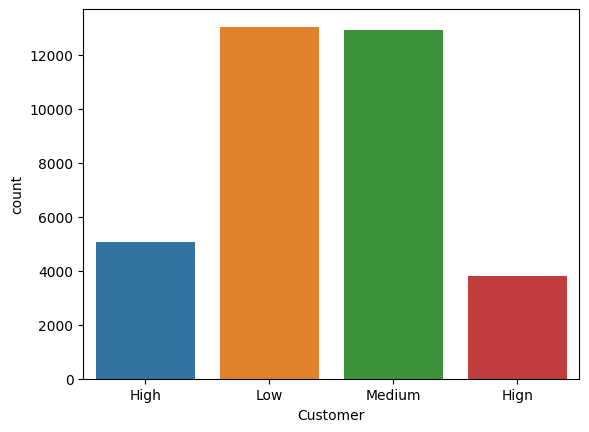

In [5]:
sns.countplot(x="Customer", data=df);

There's an error in one of the customer segments - Hign as extracted from the data. This is corrected via the codes below.

In [49]:
#Investigate the affected column - Hign
df[df["Customer"] == "Hign"].head(3)

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,...,Unit_Price,year,month,month_name,quarter,age_group,cost,revenue,profit,profit_label
29770,2015-08-03,Hign,Derick,28,F,Lagos,Phones,IPhone,Cash,1.0,...,2136.00,2015,8,August,3,25-40 Adult,2295.00,2136.00,-159.0,Loss
29771,2015-08-04,Hign,Derick,28,F,Lagos,Accessories,Keyboard,Cash,2.0,...,19.50,2015,8,August,3,25-40 Adult,35.00,39.00,4.0,Profit
29772,2015-08-04,Hign,Derick,28,F,Lagos,Accessories,Keyboard,Cash,3.0,...,18.67,2015,8,August,3,25-40 Adult,50.01,56.01,6.0,Profit


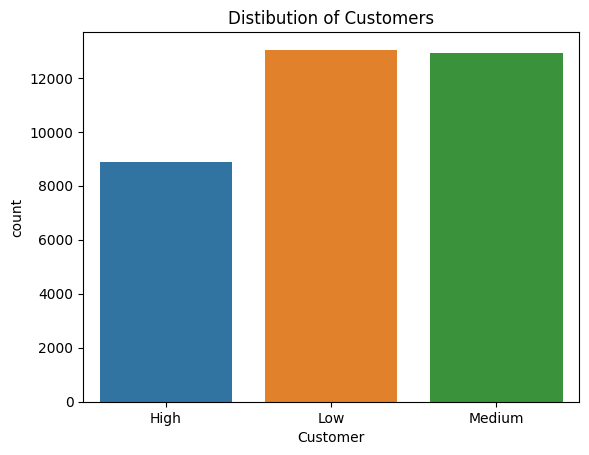

In [19]:
#Correct the spelling of hign to high.
'''This code corrects the customer column in the dataset from Hign to High'''
df.loc[df["Customer"]=="Hign", "Customer"]="High"

'''Re-generate the correct visual'''
sns.countplot(x="Customer", data=df)
plt.title("Distibution of Customers");

The customer distribution viz above shows low customer type had the highest count of transactions at 13,041 while the least was high customer type with a count of 8,899.

In [56]:
#To see specific count of each customer
df["Customer"].value_counts()

Customer
Low       13041
Medium    12926
High       8899
Name: count, dtype: int64

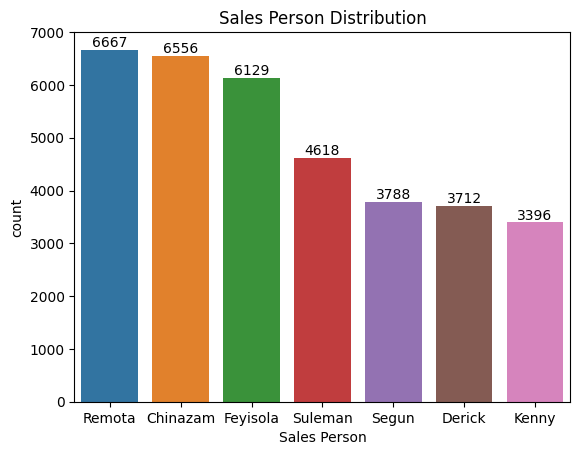

In [67]:
#Visualize count of transactions by SalesPerson******
ax=sns.countplot(x=df["Sales Person"], order=df["Sales Person"].value_counts(ascending=False).index)
values=df["Sales Person"].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=values)
plt.title("Sales Person Distribution");

From the chart above, clearly Salesperson-Remota had the highest sales transaction by count with a total of 6,667 transactions while Kenny had the least with a total of 3,396 transactions. 

In [62]:
df.columns

Index(['Date', 'Customer', 'Sales Person', 'Customer_Age', 'Customer_Gender',
       'State', 'Product_Category', 'Sub_Category', 'Payment Option',
       'Quantity', 'Unit_Cost', 'Unit_Price', 'year', 'month', 'month_name',
       'quarter', 'age_group', 'cost', 'revenue', 'profit', 'profit_label'],
      dtype='object')

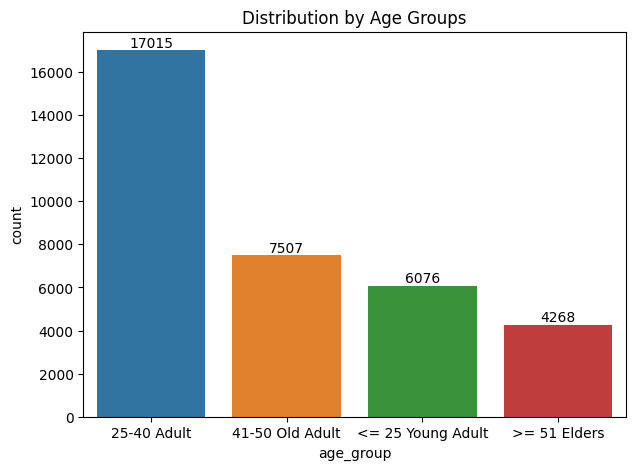

In [70]:
#Total transactions by customer Age Group.
plt.figure(figsize=(7,5))
ax=sns.countplot(x=df["age_group"], order=df["age_group"].value_counts(ascending=False).index)
values=df["age_group"].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=values)
plt.title("Distribution by Age Groups");

The chart above depicts most of the transactions were done by customers in the 25-40: Adult age group with a total transaction count of 17,015 followed by the 41-50: Old Adult age group with a total transaction count of 7,507 while the least was the 51 and above age group with 4,268. This Segmentation chart will be very valuable to the marketing team in planning their marketing budget and determining which segement to concentrate on for targeted advert & marketing campaign for improved ROI. Clearly the group to focus on will be the 25-40: Adult age group with more than 50% (2x) of the entire client population. 

In [71]:
df.columns

Index(['Date', 'Customer', 'Sales Person', 'Customer_Age', 'Customer_Gender',
       'State', 'Product_Category', 'Sub_Category', 'Payment Option',
       'Quantity', 'Unit_Cost', 'Unit_Price', 'year', 'month', 'month_name',
       'quarter', 'age_group', 'cost', 'revenue', 'profit', 'profit_label'],
      dtype='object')

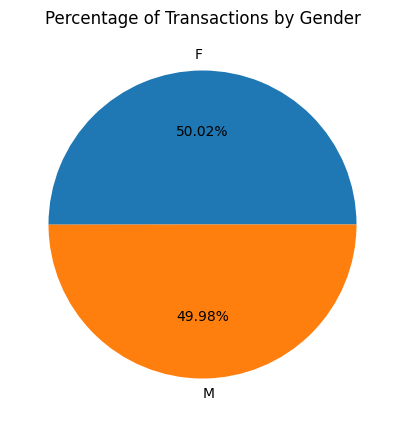

In [74]:
#Total transaction by customer gender.
fig,ax=plt.subplots(figsize=(5,5))
count=Counter(df["Customer_Gender"])
ax.pie(count.values(), labels=count.keys(), autopct=lambda p:f'{p:.2f}%')
ax.set_title("Percentage of Transactions by Gender");

The viz above highlights the spread of clients by gender showing a balanced mix of 50% apiece. 

In [79]:
df.columns

Index(['Date', 'Customer', 'Sales Person', 'Customer_Age', 'Customer_Gender',
       'State', 'Product_Category', 'Sub_Category', 'Payment Option',
       'Quantity', 'Unit_Cost', 'Unit_Price', 'year', 'month', 'month_name',
       'quarter', 'age_group', 'cost', 'revenue', 'profit', 'profit_label'],
      dtype='object')

State
Lagos        10332
Abuja         6421
Abia          5206
Adamawa       2446
Akwa Ibom     1287
Edo           1229
Anambra       1171
Bauchi        1112
Bayelsa       1092
Benue          869
Name: count, dtype: int64


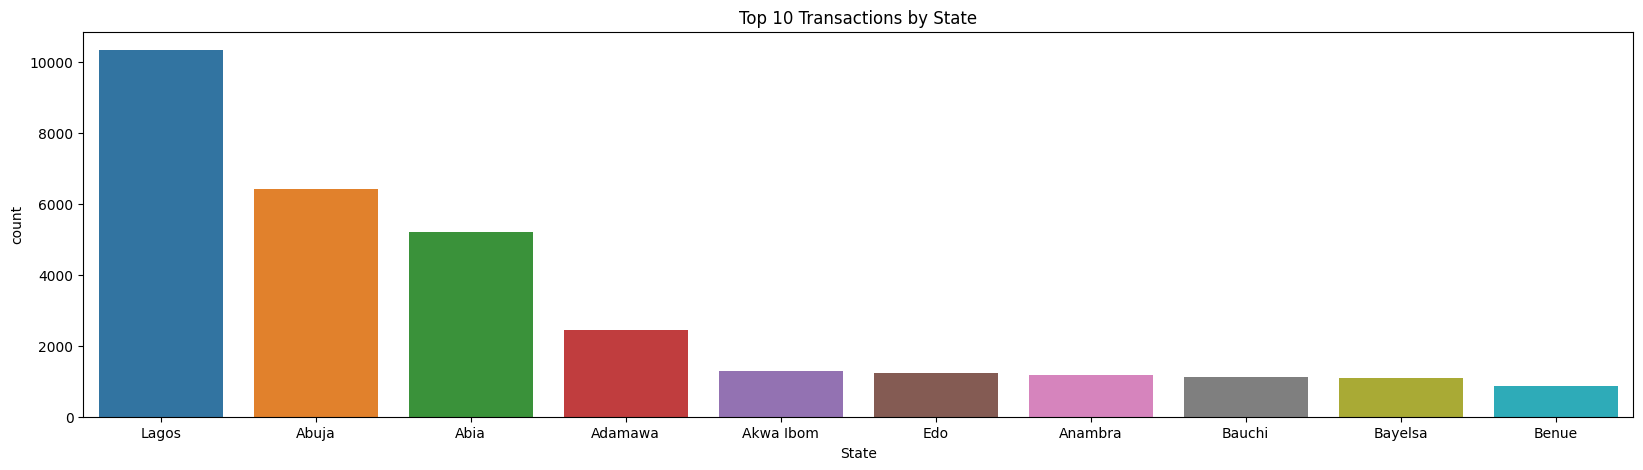

In [82]:
#Total Transactions by State (Top 10 Only).
plt.figure(figsize=(20,5))
topten=df["State"].value_counts().head(10)
sns.countplot(x="State", data=df, order=topten.index);
print(topten)
plt.title("Top 10 Transactions by State")
plt.show();
              

The above chart depicts the top 10 states with the highest count of recorded transactions with Lagos, Abuja and Abia as top three states with transaction counts of 10,332, 6,421 and 5,206 respectively.   

Product_Category
Accessories    22534
Phones          7093
Clothing        5239
Name: count, dtype: int64


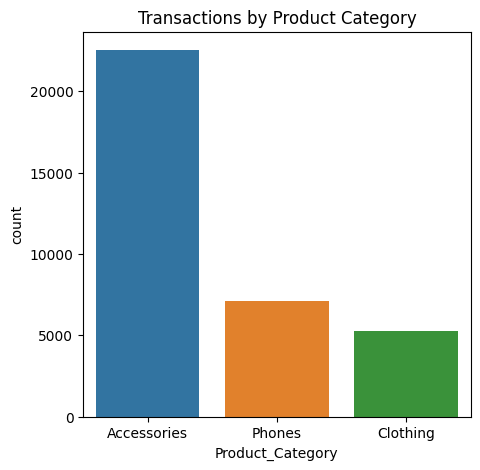

In [86]:
#Total Transactions by Product Category.
plt.figure(figsize=(5,5))
topten=df["Product_Category"].value_counts().head(10)
sns.countplot(x="Product_Category", data=df, order=topten.index);
print(topten)
plt.title("Transactions by Product Category")
plt.show();

Visualizing product performance by category shows clients bought more of accessories at a total count of about 25,000 than the other products - phones & clothing at about 7,000 and 5,000. This information will also be valuable to the marketing team to enable them adequately budget for their maketing and ad campaigns for an improved ROI. 

Sub_Category
Keyboard        11112
Ear Piece        5295
Wrist Watch      4176
Samsung          3022
IPhone           2737
Jerseys          2000
Tshirts          1517
Infinix          1334
Screen Guard      762
Shorts            566
Name: count, dtype: int64


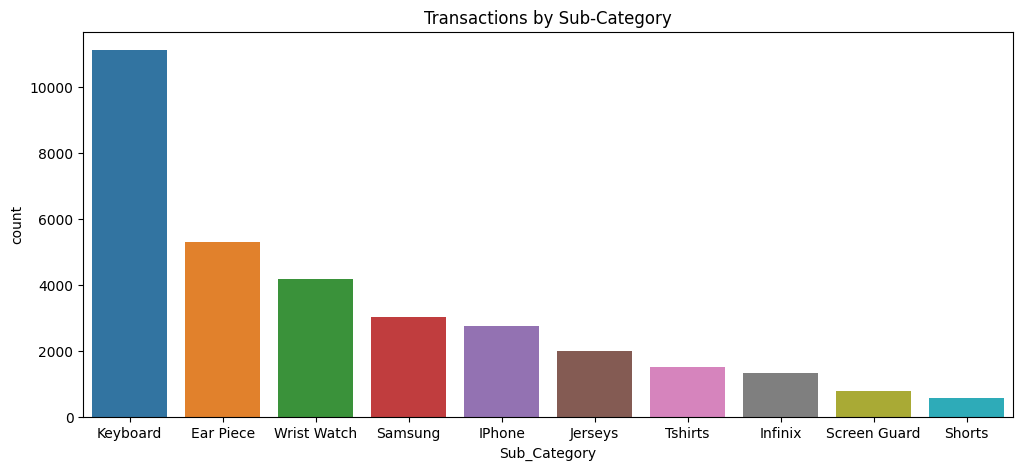

In [91]:
#Total Transactions by Sub-Category.
plt.figure(figsize=(12,5))
topten=df["Sub_Category"].value_counts().head(10)
sns.countplot(x="Sub_Category", data=df, order=topten.index);
print(topten)
plt.title("Transactions by Sub-Category")
plt.show();

The visual above helps us to view in more details performance of the product sub-category. A top 10 ranking shows Keyboard, Ear Piece and Wrist-watch are the top three products in the products sub-category group while Infinix, Screen guard and Shorts completes the ranking in that order. This visual will also be an important tool for both Executive Management and the marketing team because it determines the products to focus more on in terms of advert and marketing spend for an improved return on investment (ROI). 

Payment Option
Cash      15911
POS       11013
Online     7942
Name: count, dtype: int64


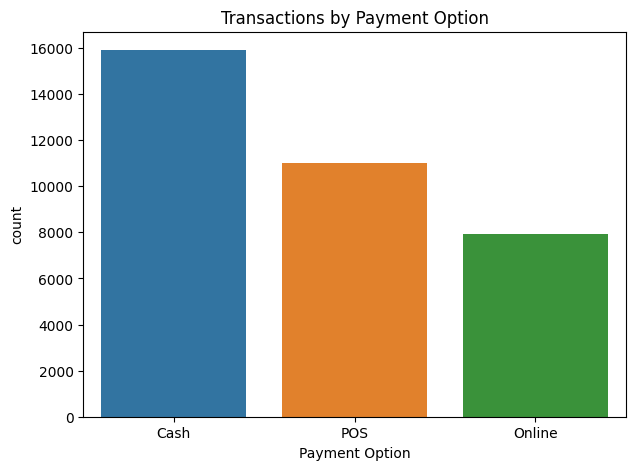

In [93]:
#Total Transactions by Payment Options.
plt.figure(figsize=(7,5))
topten=df["Payment Option"].value_counts().head(10)
sns.countplot(x="Payment Option", data=df, order=topten.index);
print(topten)
plt.title("Transactions by Payment Option")
plt.show();

The visual above depicts that cash was the highest payment option prefered by clients. Payment via POS terminals was second while Online payment was least. 

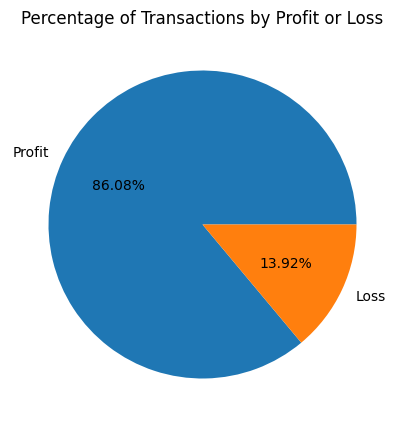

In [95]:
#Total transaction by Profit or Loss.
fig,ax=plt.subplots(figsize=(5,5))
count=Counter(df["profit_label"])
ax.pie(count.values(), labels=count.keys(), autopct=lambda p:f'{p:.2f}%')
ax.set_title("Percentage of Transactions by Profit or Loss")
plt.show();

The viz above confirms that from all transactions recorded in the period 86% translated to profit while 14% translated to loss.

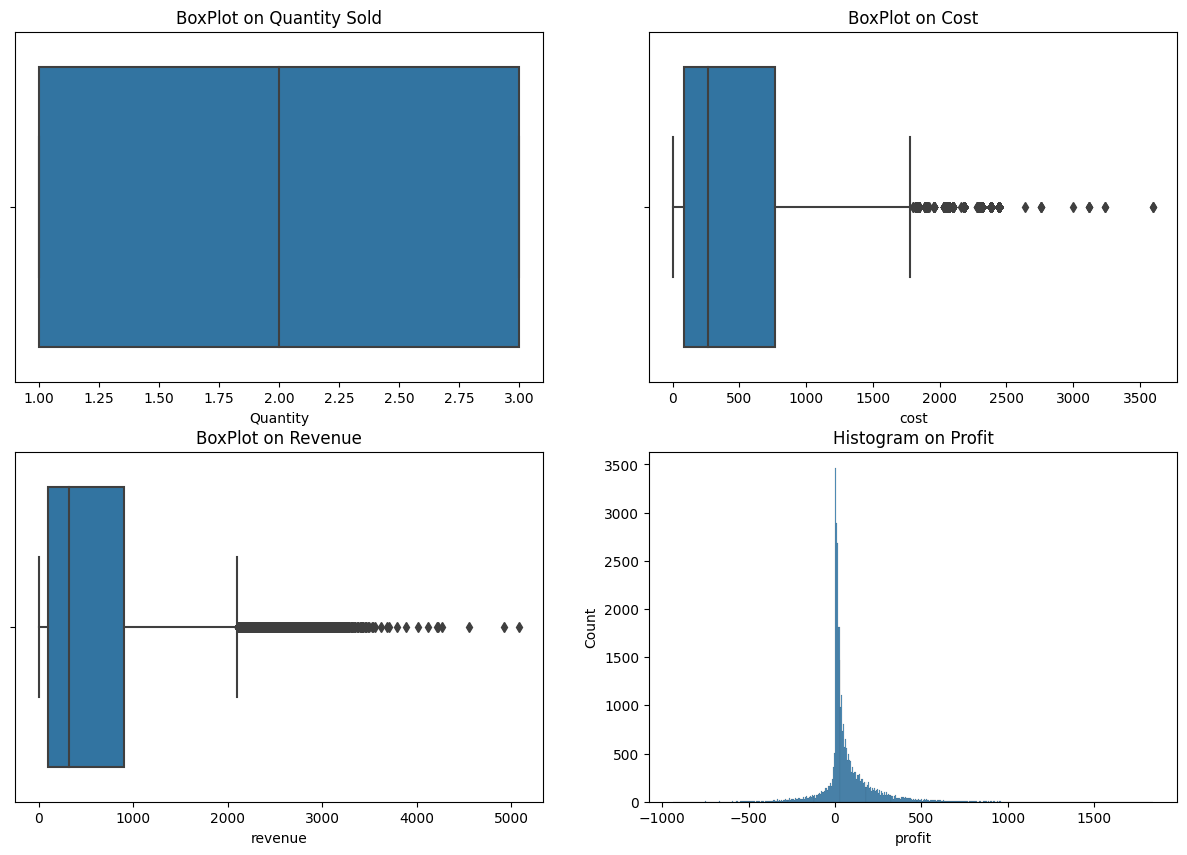

In [24]:
#Visualizing relationship between Quantity, Cost, Revenue & Profits.
fig, axs=plt.subplots(nrows=2, ncols=2, figsize=(15,10))

'''viz for boxplot on quantity sold'''
sns.boxplot(x="Quantity", data=df, ax=axs[0,0])
axs[0,0].set_title("BoxPlot on Quantity Sold")

'''viz for boxplot on cost'''
sns.boxplot(x="cost", data=df, ax=axs[0,1])
axs[0,1].set_title("BoxPlot on Cost")

'''viz for boxplot on revenue'''
sns.boxplot(x="revenue", data=df, ax=axs[1,0])
axs[1,0].set_title("BoxPlot on Revenue")

'''viz for histogram on profit'''
sns.histplot(x="profit", data=df, ax=axs[1,1])
axs[1,1].set_title("Histogram on Profit");
            

The first viz (top-left) highlights the variable 'quantity sold' in the dataset where the first quartile Q1 is 1 and the third quartile Q3 is 3. The interquartile range (IQR) which represents the spread of the middle 50% of the data is 2 while the median quantity is also 2. 

The second viz (top-right) highlights the variable 'cost' in the dataset where the first quartile Q1 is 200 and the third quartile Q3 is 800. The interquartile range (IQR) which represents the spread of the middle 50% of the data is 600 while the median cost is 300. The smallest data point within the dataset that is not considered an outlier is 0 while the maximum data point within the dataset that is not considered an outlier is 1,800. Extreme values or outliers were cost amounts exceeding 1,800. 

The third viz (bottom-left) highlights the variable 'revenue' in the dataset where the first quartile Q1 is 200 and the third quartile Q3 is 900. The interquartile range (IQR) which represents the spread of the middle 50% of the data is 700 while the median revenue is 400. The smallest data point within the dataset that is not considered an outlier is 0 while the maximum data point within the dataset that is not considered an outlier is 2,200. Extreme values or outliers were revenue amounts exceeding 2,200. 

The fourth viz (bottom-right) highlights the variable 'profit' in the dataset. The chart shows there were more counts of profits per transaction than losses with maximum profit amount not exceeding 1,000 and maximum loss amount not exceeding -500 per transaction. This is also in sync with our earlier analysis as shown in the profit/loss chart directly above where profit was 86% while loss was 14% for all transactions.  


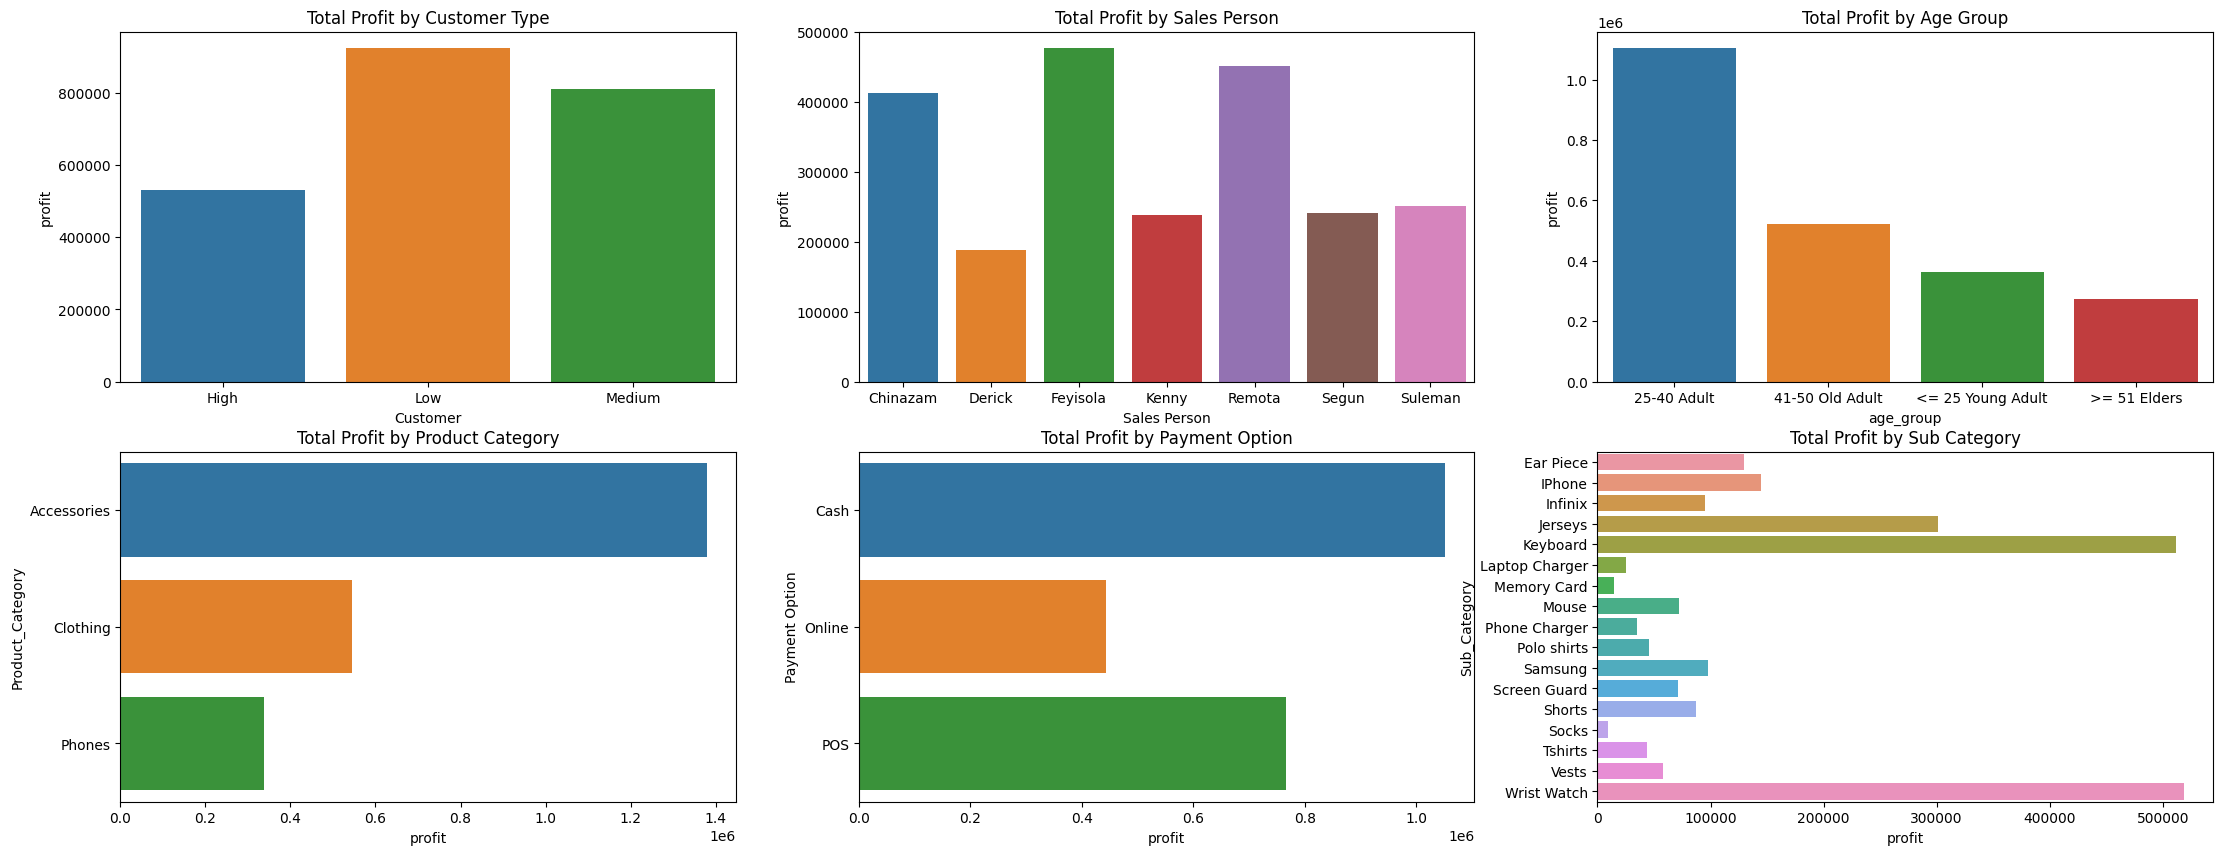

In [25]:
#Bivariate Analysis - Relationship between a numerical variable (Profit) & multi-categorical variables*******
fig,axs=plt.subplots(nrows=2, ncols=3, figsize=(27,10))

'''viz for barplot depicting relationship between Customer & Profit'''
cust_prof=df.groupby("Customer")["profit"].sum().reset_index()
sns.barplot(x="Customer", data=cust_prof, y='profit', ax=axs[0,0])
axs[0,0].set_title("Total Profit by Customer Type")

'''viz for barplot depicting relationship between SalesPerson & Profit'''
sp_prof=df.groupby("Sales Person")["profit"].sum().reset_index()
sns.barplot(x="Sales Person", data=sp_prof, y='profit', ax=axs[0,1])
axs[0,1].set_title("Total Profit by Sales Person")

'''viz for barplot depicting relationship between age_group & Profit'''
ag_prof=df.groupby("age_group")["profit"].sum().reset_index()
sns.barplot(x="age_group", data=ag_prof, y='profit', ax=axs[0,2])
axs[0,2].set_title("Total Profit by Age Group")

'''viz for barplot depicting relationship between Product category & Profit'''
pc_prof=df.groupby("Product_Category")["profit"].sum().reset_index()
sns.barplot(y="Product_Category", data=pc_prof, x='profit', ax=axs[1,0])
axs[1,0].set_title("Total Profit by Product Category")

'''viz for barplot depicting relationship between Payment option & Profit'''
po_prof=df.groupby("Payment Option")["profit"].sum().reset_index()
sns.barplot(y="Payment Option", data=po_prof, x='profit', ax=axs[1,1])
axs[1,1].set_title("Total Profit by Payment Option")

'''viz for barplot depicting relationship between Sub-category & Profit'''
sc_prof=df.groupby("Sub_Category")["profit"].sum().reset_index()
sns.barplot(y="Sub_Category", data=sc_prof, x='profit', ax=axs[1,2])
axs[1,2].set_title("Total Profit by Sub Category");

The first viz (top-left) highlights the relationship between the variables 'Customer Type & Profit' where the group that achieved the highest profit was the low customer group while the group with the least recorded profit was the high customer group. 

The second viz (top-center) examines the relationship between the variables 'SalesPerson & Profit' where the Salesperson with the highest profit was Feyisola followed by Remota and Chinazam in second and third position while the Salesperson with the least profit was Derick. 

The third viz (top-right) depicts the relationship between the variables 'Age Group & Profit' where the Age group with the highest profit was the Adult(25-40) age group followed by Old Adult(41-50) and Young Adult(<=25) age groups in second and third position while the Elders(51+) age group contributed the least profit. 

The fourth viz (bottom-left) highlights the relationship between the variables 'Product Category & Profit' where the Accessories product category clearly outperformed the clothing and phones categories by profit in that order.  

The fifth viz (bottom-center) shows the relationship between the variables 'Payment option & Profit' where the cash channel contributed the highest profits followed by the POS channel in second place while the Online channel was the least. 

The sixth viz (bottom-right) depicts the relationship between the variables 'Product Sub-Category & Profit' where the top product sub-category performers by profit were wristwatch, keyboard and jerseys in that order while the least was socks.

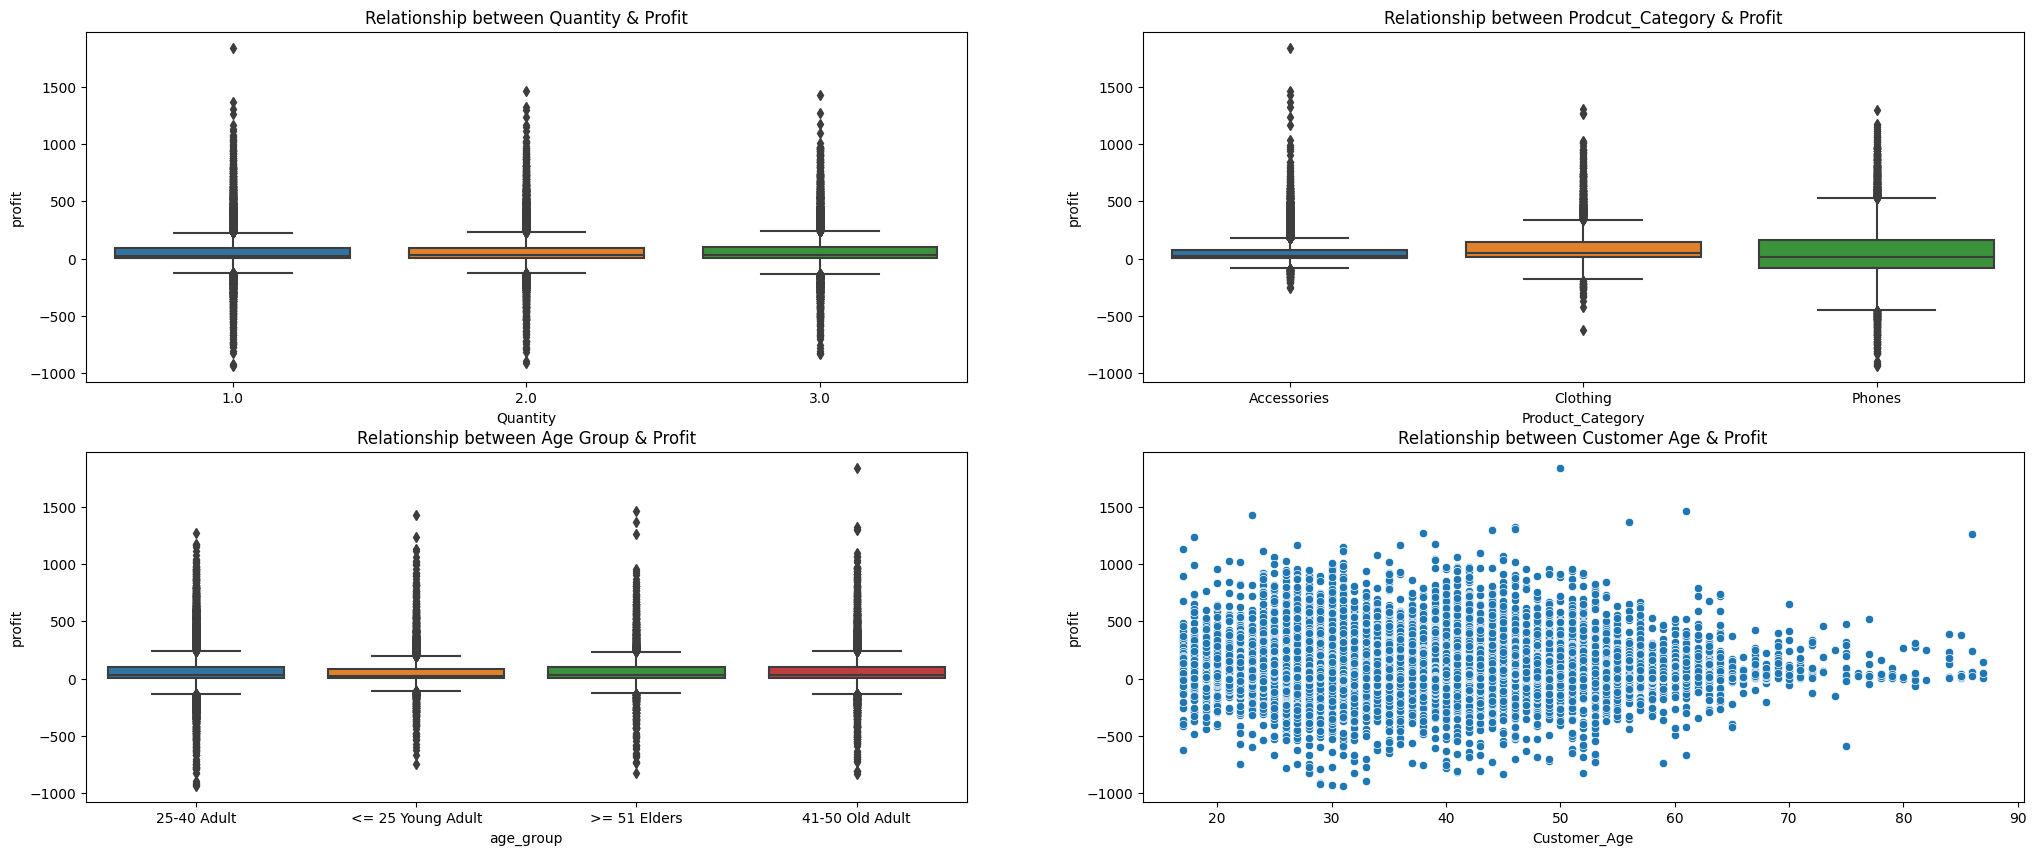

In [122]:
#Bivariate Analysis - Relationship between two variables*******
fig,axs=plt.subplots(nrows=2, ncols=2, figsize=(25,10))
sns.boxplot(x="Quantity", y='profit', data=df, ax=axs[0,0])
axs[0,0].set_title("Relationship between Quantity & Profit");

sns.boxplot(x="Product_Category", y='profit', data=df, ax=axs[0,1])
axs[0,1].set_title("Relationship between Prodcut_Category & Profit")

sns.boxplot(x="age_group", y='profit', data=df, ax=axs[1,0])
axs[1,0].set_title("Relationship between Age Group & Profit")

sns.scatterplot(x="Customer_Age", y='profit', data=df, ax=axs[1,1])
axs[1,1].set_title("Relationship between Customer Age & Profit");

The first chart (top-left) highlights the relationship between the variables 'Quantity & Profit' where the median ordered quantity was 2. 

The second chart (top-right) highlights the relationship between the variables 'Product category & Profit' where the most profitable is Accessories. The chart also shows the volume of losses incurred by each category with phones incurring the most losses. 

The third visual (bottom-left) highlights the relationship between the variables 'Age Group & Profit'. All the age groups contributed significant amount of profits to the pool with the Old Adults (41-50) contributing the most. Likewise, all the groups contributed significant amount of losses with the Young Adults(25 & below) contributing the least.

The fourth chart (bottom-right) highlights the relationship between the variables 'Customer Age & Profit'. The scatterplot shows that profit & loss from the business can be attributed to customers with ages from 10 to 65 years. This age range contains active customers that contributed to the success of the business. Hence, this chart will be very useful to both management and the marketing team for drawing up targeted marketing campaigns which will drive customer patronage and increase ROI. 

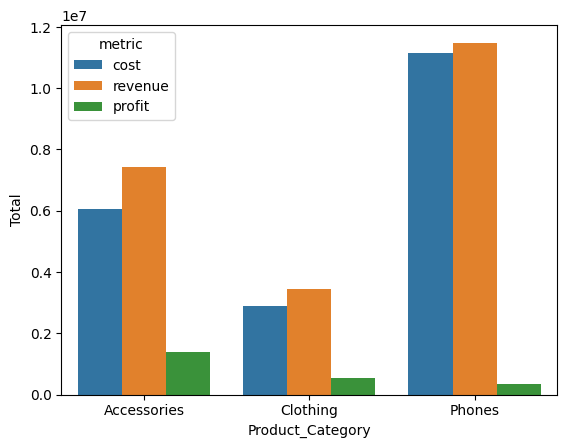

In [136]:
#Multivariate Analysis - Relationship between three or more varaibles - Product Category against cost, revenue & profit
#using the GROUPBY function just like in SQL.

procat=df.groupby("Product_Category")[["cost", "revenue", "profit"]].sum().reset_index()
procat=pd.melt(procat, id_vars="Product_Category", var_name="metric", value_name="Total")
sns.barplot(data=procat, x="Product_Category", y="Total", hue="metric");

From the chart above, Management should channel resources to ramping up more profits in the Accessories product category because it's the category the most significant ROI and moderate cost and revenue figures compared to the phones category with very high cost and reveue figures and extremely low profit margins. 

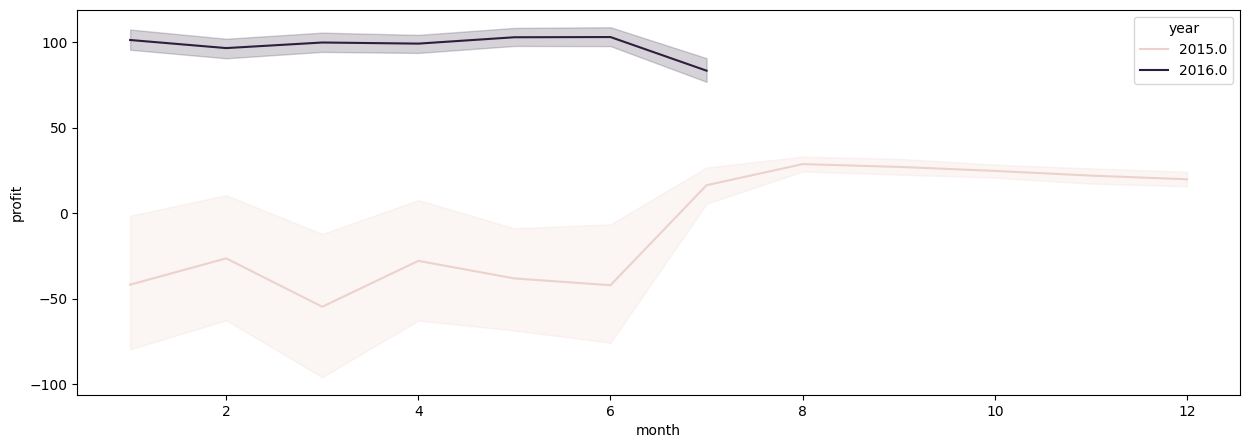

In [27]:
#Trend Analysis
plt.figure(figsize=(15,5))
sns.lineplot(x='month', y='profit', data=df, hue='year');

The trend analysis chart above shows the company made losses in the first half (H1) of 2015 but broke even in the seventh month and remained in blue throughout the second half of 2015 (H2). The company maintained a very strong profit position in the first half (H1) of 2016 up on till the seventh month where it achieved a slight drop in profit due to headwinds. 

In [130]:
#Visualizing the above data using PivotTable******
df.pivot_table(values='profit', index='year', columns='month', aggfunc='sum')

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2015,-5778.70,-4079.65,-8163.79,-4945.69,-7801.45,-8690.61,15104.47,65926.24,62172.33,62950.66,54480.9,67448.12
2016,280204.25,263640.18,299777.67,307746.51,356915.59,357549.86,107151.79,NaN,NaN,NaN,NaN,NaN


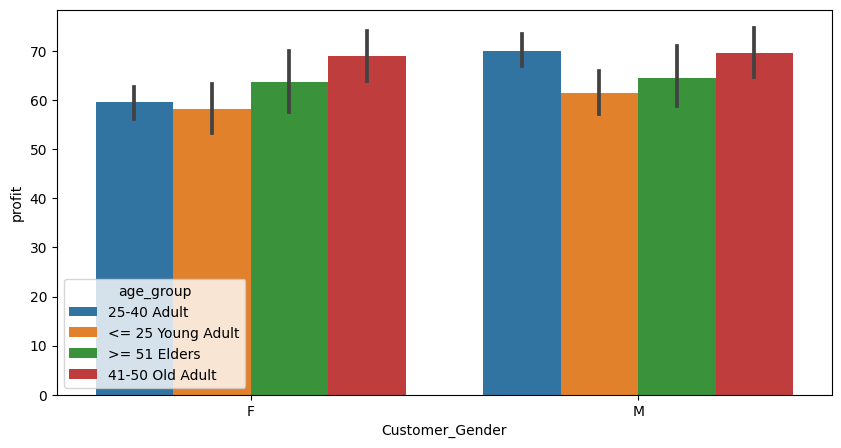

In [138]:
#Multivariate Analysis: Customer gender, Age_group and Profit
plt.figure(figsize=(10,5))
sns.barplot(x="Customer_Gender", y="profit", data=df, hue="age_group");

The chart above highlights the spread of profits by gender which is roughly 50:50 basis. However, further analysis reveal that the major contributors within each gender. In the female category, the major profit contributor were the Old Adults(41-50) while the least were the Young Adults(25 & below). In the male category, the major profit contributor were the Adults(25-40) while the least were Young Adults(25 & below). 

In [31]:
#Correlation Analysis
numeric_df = df.select_dtypes(include='number')
a=numeric_df.corr()
print(a)

              Customer_Age  Quantity  Unit_Cost  Unit_Price      year  \
Customer_Age      1.000000  0.002801   0.025360    0.026300  0.052688   
Quantity          0.002801  1.000000  -0.312514   -0.324109  0.000919   
Unit_Cost         0.025360 -0.312514   1.000000    0.981033 -0.073245   
Unit_Price        0.026300 -0.324109   0.981033    1.000000 -0.022628   
year              0.052688  0.000919  -0.073245   -0.022628  1.000000   
month            -0.051610 -0.000925  -0.018384   -0.051448 -0.810662   
quarter          -0.051932 -0.000358  -0.024225   -0.057183 -0.812493   
cost              0.026537  0.008295   0.854908    0.832969 -0.084566   
revenue           0.027762  0.008418   0.836957    0.851034 -0.025361   
profit            0.013914  0.003097   0.171576    0.338499  0.259750   

                 month   quarter      cost   revenue    profit  
Customer_Age -0.051610 -0.051932  0.026537  0.027762  0.013914  
Quantity     -0.000925 -0.000358  0.008295  0.008418  0.003097  
U

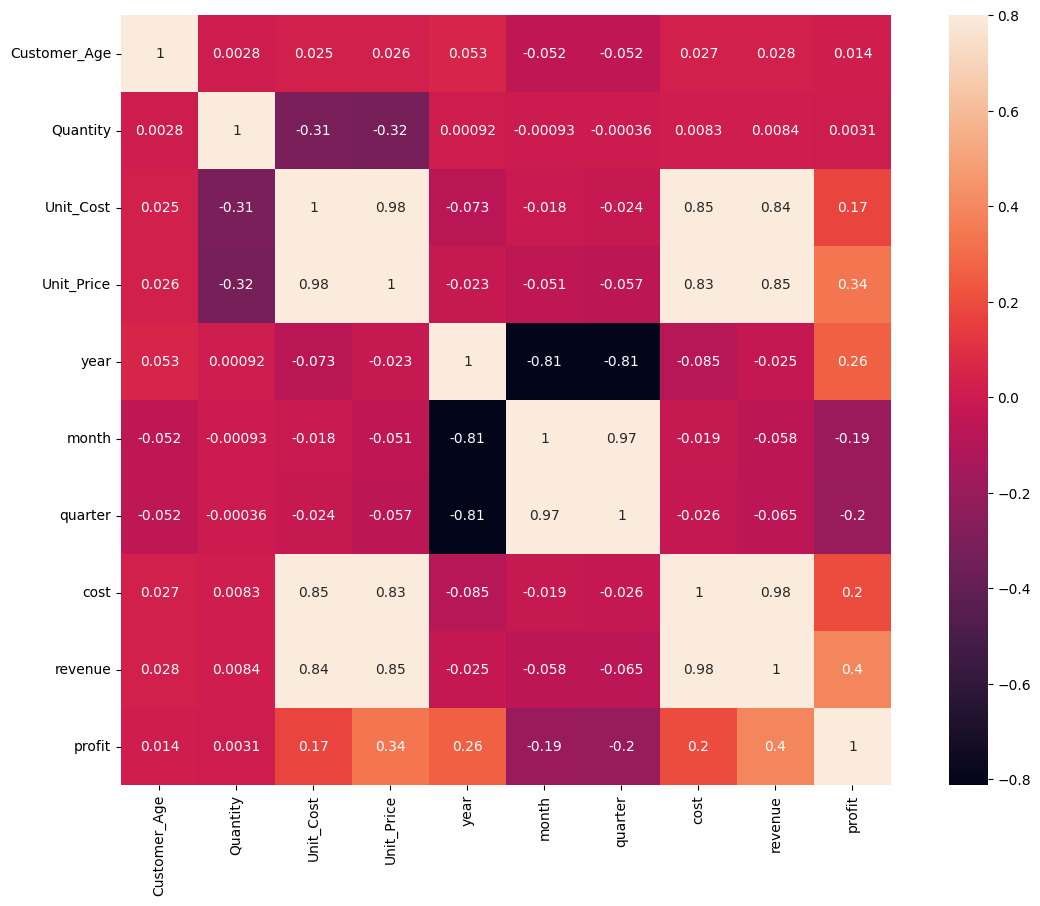

In [36]:
#Ploting the correlation for all numeric columns in the dataset using a heatmap.
a=numeric_df.corr()
fig,ax=plt.subplots(figsize=(15,10))
sns.heatmap(a, vmax=.8, square=True, annot=True);

1. Customer Age : There's a postive correlation between customer age & revenue(0.028) as well as customer age & profit(0.014)
2. Cost: There's a very strong positive correlation between cost and revenue(0.98) and a positive correlation between cost and profit(0.2)
3. Revenue: There's a positive correlation between revenue and profit(0.4)
4. Quantity: A negative correlation exists between unit cost & quantity (-0.31) and unit price & quantity(-0.32)

In summary, both variables in each instance are linearly related to each other and thus move in the same direction. 

C:\Users\shopinverse\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\shopinverse\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


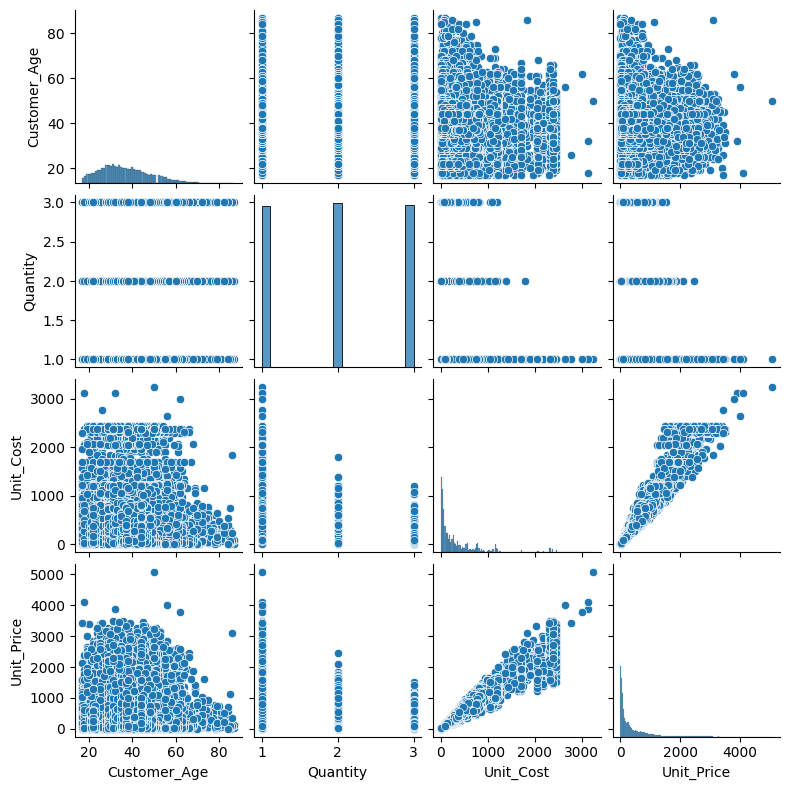

In [153]:
#Pairplot - Plots a visualization of all numercial column variables in the dataset*******
sns.pairplot(df, size=2.0);


In the pairplot chat above, each visual depicts a high level of clustering which represents activities between two variables with some extreme values or outliers. These clustering reveal insights or patterns in the dataset which can assist management make the right business decisions which will further improve ROI. 